<a href="https://colab.research.google.com/github/stxupengyu/NCF-MF-for-Recommendation/blob/main/yelp_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Link Google Drive

In [ ]:
#link google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#enter the folder
!ls
import os
os.chdir('/content/drive/My Drive/Project/Deep-Rec-Sys')
!ls

Dataset_Agreement.pdf		     yelp_academic_dataset_tip.json
kaggle.json			     yelp_academic_dataset_user.json
yelp_academic_dataset_business.json  yelp_data_analysis.ipynb
yelp_academic_dataset_checkin.json   yelp_recomendation.ipynb
yelp_academic_dataset_review.json
Dataset_Agreement.pdf		     yelp_academic_dataset_tip.json
kaggle.json			     yelp_academic_dataset_user.json
yelp_academic_dataset_business.json  yelp_data_analysis.ipynb
yelp_academic_dataset_checkin.json   yelp_recomendation.ipynb
yelp_academic_dataset_review.json


#Download Data

In [ ]:
#下载并上传kaggle.json文件
!pip install kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Project/Deep-Rec-Sys"
#download kaggle dataset(10GB)
!kaggle datasets download -d yelp-dataset/yelp-dataset
!ls
!unzip yelp-dataset.zip

yelp-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset_Agreement.pdf		     yelp_academic_dataset_tip.json
kaggle.json			     yelp_academic_dataset_user.json
yelp_academic_dataset_business.json  yelp_data_analysis.ipynb
yelp_academic_dataset_checkin.json   yelp-dataset.zip
yelp_academic_dataset_review.json    yelp_recomendation.ipynb
Archive:  yelp-dataset.zip
replace Dataset_Agreement.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Read Bussiness Data

In [ ]:
#read the dataset:yelp,review&business
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# We only use the first 1,000,000 data in this assignment
users = []
with open('yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 1000000:
            break
subset_business = pd.DataFrame(users)
print('The shape of the data:',subset_business.shape)
display(subset_business.tail(2))

The shape of the data: (209393, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
209391,RSSIsgO00OuWQTRoITacpA,Indian Trail Dog Training,,Indian Trail,NC,28079,35.101965,-80.599385,5.0,3,1,None,"Pet Services, Pet Training, Pets","{'Monday': '0:0-0:0', 'Tuesday': '7:0-19:0', '..."
209392,tOcYmewXFhQeZh3V42ymwg,Kudlow Ye,"21 St Clair Avenue E, Suite 401",Toronto,ON,M4T 1L9,43.688214,-79.392756,5.0,3,1,None,"Tax Services, Professional Services, Accountan...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


# Ratings Distribution:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


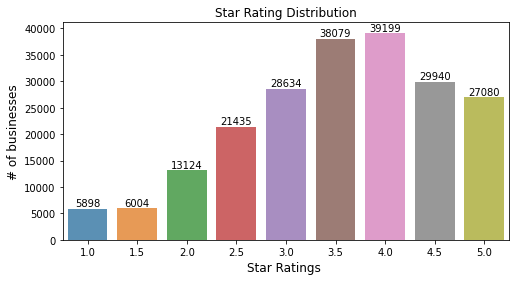

In [ ]:
#Get the distribution of the ratings
x=subset_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Categories Distribution:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


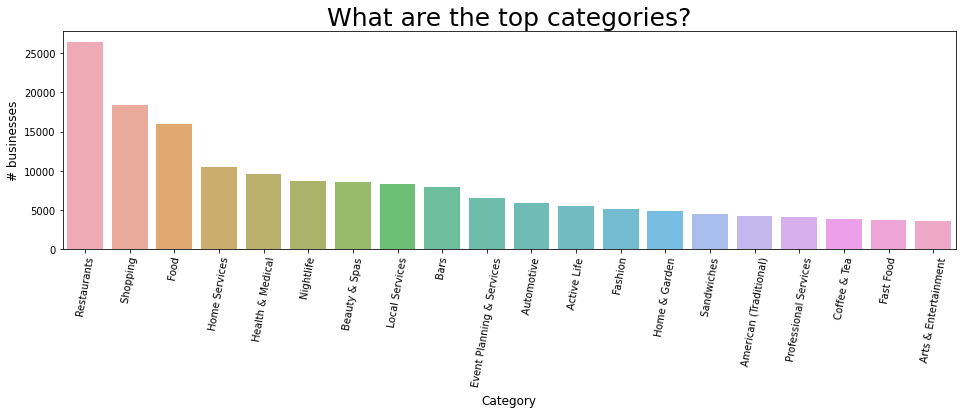

In [ ]:
business_cats = ''.join(subset_business['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#Read Review Data

In [ ]:
# We only use the first 1,000,000 data in this assignment
users = []
with open('yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 1000000:
            break
subset_review = pd.DataFrame(users)
print('The shape of the data:',subset_review.shape)
display(subset_review.tail(2))

The shape of the data: (1000000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
999998,7yqTN-PM-bnfwuryhIb7rA,WJrx5OjI8Ux2RNFDa3HKyA,IcHVYlgNGR-Zz8fnceiJ6g,4.0,0,0,0,Best Long Island Iced Teas anywhere. I love co...,2014-05-17 17:27:17
999999,pKYvRnfg9wDlXu7vhyUu4g,A_lR_ibGJtp8WwBzZrX6vQ,rtwojGcYuhbLbQ9D1Z2gSg,4.0,0,0,0,I love the mirrors on all the pillars. It give...,2013-09-16 01:42:01


In [ ]:
# pull out needed columns from subset_review table
df_review = subset_review[['user_id','business_id','stars', 'useful','funny','cool','text']]
display(df_review.tail(2))

,user_id,business_id,stars,useful,funny,cool,text
999998,WJrx5OjI8Ux2RNFDa3HKyA,IcHVYlgNGR-Zz8fnceiJ6g,4.0,0,0,0,Best Long Island Iced Teas anywhere. I love co...
999999,A_lR_ibGJtp8WwBzZrX6vQ,rtwojGcYuhbLbQ9D1Z2gSg,4.0,0,0,0,I love the mirrors on all the pillars. It give...


#Combine Two Data in Toronto

In [ ]:
# Businesses in Toronto and currently open business
city = subset_business[(subset_business['city'] == 'Toronto')] #& (subset_business['is_open'] == 1)]
toronto = city[['business_id','name','address', 'categories', 'attributes','stars']]
rest = toronto.reset_index()
display(rest.tail(2))

,index,business_id,name,address,categories,attributes,stars
20364,209377,n2BKYb8aw4AhRKLkdUjQRg,Steak & Cheese & Quick Pita Restaurant,199 College St,"Sandwiches, Restaurants","{'OutdoorSeating': 'False', 'Alcohol': 'u'none...",2.5
20365,209392,tOcYmewXFhQeZh3V42ymwg,Kudlow Ye,"21 St Clair Avenue E, Suite 401","Tax Services, Professional Services, Accountan...",None,5.0


In [ ]:
# pull out names and addresses of the restaurants from rest table
restaurant = rest[['business_id', 'name', 'address','categories']]
display(restaurant.tail(2))

,business_id,name,address,categories
20364,n2BKYb8aw4AhRKLkdUjQRg,Steak & Cheese & Quick Pita Restaurant,199 College St,"Sandwiches, Restaurants"
20365,tOcYmewXFhQeZh3V42ymwg,Kudlow Ye,"21 St Clair Avenue E, Suite 401","Tax Services, Professional Services, Accountan..."


In [ ]:
# combine df_review and restaurant table
combined_business_data = pd.merge(df_review, restaurant, on='business_id')
display(combined_business_data.tail(2))

,user_id,business_id,stars,useful,funny,cool,text,name,address,categories
71008,4yQtGuSUtHhQTcWFrD2Lnw,fFKbj19pBWMQosCn9qsTdw,5.0,0,0,0,I was looking for hairdressers to go to becaus...,Lebel & Crowe,1491 Dundas Street W,"Beauty & Spas, Hair Salons"
71009,eXhwli2CzubJ058MEXtCsg,os9fE0YwboRi9PDZZ7gf2w,5.0,9,0,1,I'm so pleased to have stumbled across this ut...,EweKnit,585 Markham Street,"Shopping, Knitting Supplies"


In [ ]:
print('how many users?：',len(combined_business_data['user_id'].drop_duplicates()))
print('how many locations?：',len(combined_business_data['business_id'].drop_duplicates()))

how many users?： 35090
how many locations?： 3527


# Ratings Distribution:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


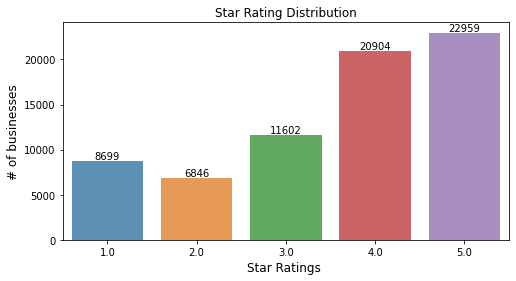

In [ ]:
#Get the distribution of the ratings
x=combined_business_data['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Categories Distribution:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


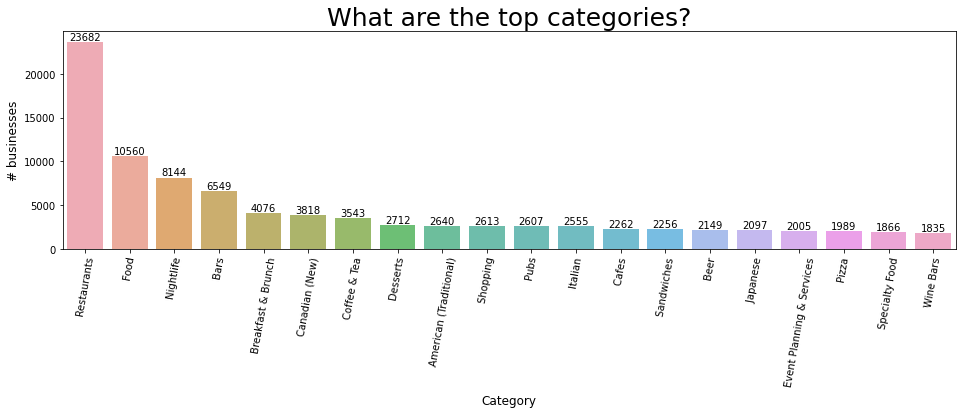

In [ ]:
business_cats = ''.join(combined_business_data['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#Save Data to CSV

In [ ]:
#final necessary data
dataset=combined_business_data[['user_id', 'business_id', 'stars','text']]
display(dataset.tail(2))

,user_id,business_id,stars,text
71008,4yQtGuSUtHhQTcWFrD2Lnw,fFKbj19pBWMQosCn9qsTdw,5.0,I was looking for hairdressers to go to becaus...
71009,eXhwli2CzubJ058MEXtCsg,os9fE0YwboRi9PDZZ7gf2w,5.0,I'm so pleased to have stumbled across this ut...


In [ ]:
#convert id to number
dictionary_user=dict(zip(list(dataset['user_id'].drop_duplicates().values), range(len(dataset['user_id'].drop_duplicates().values))))
dictionary_business=dict(zip(list(dataset['business_id'].drop_duplicates().values), range(len(dataset['business_id'].drop_duplicates().values))))
user_set=[]
for user in dataset['user_id']:
  user_set.append(dictionary_user[user]+1)
business_set=[]
for business in dataset['business_id']:
  business_set.append(dictionary_business[business]+1)
dataset['user_id']=user_set
dataset['business_id']=business_set
display(dataset.tail(2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,user_id,business_id,stars,text
0,1,1,4.0,"In the heart of Chinatown, I discovered it enr..."
1,2,1,4.0,Delicious Cavatelli and white chocolate tirami...
2,3,1,4.0,Went for a bite after going to the art museum ...
3,4,1,5.0,Peking duck and pizza are two of my favourite ...
4,5,1,5.0,"Great service, super casual, amazing house mad..."
...,...,...,...,...
71005,35090,3523,5.0,Quick at fixing my broken cellphone and for a ...
71006,17647,3524,5.0,I received top notch service at Origin Wellnes...
71007,6290,3525,2.0,A bunch of my coworkers and I went here for lu...
71008,24585,3526,5.0,I was looking for hairdressers to go to becaus...


In [ ]:
#store the dataset and then read it 
dataset.to_csv('rating_text.csv',header=-1,index=0)
pd.read_csv('rating_text.csv')

,user_id,business_id,stars,text
0,1,1,4.0,"In the heart of Chinatown, I discovered it enr..."
1,2,1,4.0,Delicious Cavatelli and white chocolate tirami...
2,3,1,4.0,Went for a bite after going to the art museum ...
3,4,1,5.0,Peking duck and pizza are two of my favourite ...
4,5,1,5.0,"Great service, super casual, amazing house mad..."
...,...,...,...,...
71005,35090,3523,5.0,Quick at fixing my broken cellphone and for a ...
71006,17647,3524,5.0,I received top notch service at Origin Wellnes...
71007,6290,3525,2.0,A bunch of my coworkers and I went here for lu...
71008,24585,3526,5.0,I was looking for hairdressers to go to becaus...


In [ ]:
#store the dataset and then read it 
dataset.iloc[:,:-1].to_csv('rating.csv',header=0,index=0)
pd.read_csv('rating.csv')

,1,1.1,4.0
0,2,1,4.0
1,3,1,4.0
2,4,1,5.0
3,5,1,5.0
4,6,1,5.0
...,...,...,...
71004,35090,3523,5.0
71005,17647,3524,5.0
71006,6290,3525,2.0
71007,24585,3526,5.0
